<a href="https://colab.research.google.com/github/EhsanOthman2021/Sachcontrol-Project/blob/main/Sachcontrol_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question1:

he first step to identifying problems from ‘L1_dataset_Update.csv’ was to analyze the dataset. This dataset includes the invoices input data from insurance policies after negotiating the invoice amount with the Credit Hire Organizations (CHO) on invoices that have failed one or more business rules. The dataset includes 26 variables (features) and 10225 invoices (samples). After investigating the different distributions of the dataset based on different features from datasets, I identified two main problems. The first main problem was classified when the input invoice (1) is correct, (2) needs to check the charge amount, or (3) includes wrong input (some important features values are missing (equal = 0), when InvoiceSavingRule is nan then the original and current features are not identical, wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both). So this problem is a multi_classification task, 0 indicates the correct invoice (called correct class), 1 indicates the invoice which needs to check the ChargeAmount (called Check_ChargeAmount class), and 2 indicates the invoice which includes wrong input (called Wrong_Input). The distribution of the dataset based on the 3classes is shown in ‘Main_task.png’ in the Questions1 folder. I found this problem based on the correlation between OriginalTotalToPayAmount, CurrentHireGross, and InvoiceSavingRule features. The OriginalTotalToPayAmount and CurrentHireGross are identical when the InvoiceSavingRule was not provided (nan); about 72% (5076 samples) of the samples with nan InvoiceSavingRule. In contrast, the OriginalTotalToPayAmount and CurrentHireGross are not identical when the InvoiceSavingRule was not provided (nan); about 28% (1951 samples) of the samples with nan InvoiceSavingRule. Thus, I identified Check_ChargeAmount class (class 1) to refer to the invoice which needs to check again; such invoices compute the TotalPenaltyChargeAmount with current features costs (such as CurrentHireGross, CurrentRepairGross, CurrentEngineerFeeGross, CurrentTotalLossFeeGross, and CurrentStorageRecoveryGross) when it should not. Further, class 1 refers to the invoice that the OriginalTotalToPayAmount and CurrentHireGross are identical, and InvoiceSavingRule was provided, for about 0.25% (8 samples) of the samples. Such invoices need to check again. Additionally, I noticed the correlation between the OriginalTotalToPayAmount and other Original features (Original HireGross, Original RepairGross, Original EngineerFeeGross, Original TotalLossFeeGross, and Original StorageRecoveryGross), OriginalTotalToPayAmount = the summation of other Original features. Moreover, SettledAmount = the summation of other Current features if InvoiceSavingRule is not provided, and SettledAmount = the summation of other Current features + TotalPenaltyChargeAmount if InvoiceSavingRule was provided. Further, many missing values (equal = 0) with OriginalTotalToPayAmount, SettledAmount, and OriginalHireGross, CurrentHireGross features. These features should have values. Thus, I identified Wrong_Input class (class 2) to refer to the invoice, which needs to check the computation or missing values again. Class 2 also indicated when OriginalHireDays and CurrentHireDays features were not identical when the OriginalTotalToPayAmount and SettledAmount were identical and InvoiceSavingRule was not provided (nan). I guessed this was also a mistake based on the dataset pattern. All other samples, which are not involved class1 and class2 problems, are identified as a correct class (class 0). The dataset was processed by replacing the nan values feature with 0 and using only the year from DateInvoiceWasUploaded and DateclaimmovedtoInvoicePaymentLogged features. The dataset, after being processed, saved into ‘L1_dataset_Update.csv’. The dataset was labeled based on the first main problem; see the identfy_tasks_from_dataset () function in the above code; the dataset was saved into ‘L1_dataset_Update.csv’ (which will use with machine learning models). This function also identify 3 sub-tasks, which will use with Decision Fusion method in Question3: • Sub-task1 is classified when both OriginalTotalToPayAmount feature and SettledAmount feature are identical and InvoiceSavingRule is nan. • Sub-task2 is classified when there is InvoiceSavingRule or nan. • Sub-task3 is classified when there is a problem with invoice input (some important features missing, when TotalPenaltyChargeAmount is nan the original and current features should be identical,wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both).

The machine learning methods were used to solve this problem using this dataset, see Questions3 answer. Such a solution will be very helpful for insurance policies to detect the invoices with problems, such as invoices that need to check again the ChargeAmount and invoice which includes wrong input (some important features missing, when TotalPenaltyChargeAmount is nan the original and current features should be identical, wrong computation for OriginalTotalToPayAmount feature or SettledAmount feature or both).

The second main problem was identified the performance regarding 4 features, which are CHO categories, Workgroup categories, the person at the insurance company processing the invoice, and DateInvoiceWasUploaded. We also present the worst performance regarding the 4 features in terms of the 3 classes in the main task. With this problem, I did not implement machine learning methods. I used two different functions in the code above (dataset_distribution () and dataset_distribution_based_on_tasks()). The dataset_distribution() function was implemented to investigate the different distribution of the dataset based on the 4 features from the dataset, see CHO chart.png, Workgroup chart.png, InsurerClaimOwner.csv, and DateInvoiceWasUploaded chart.png in the Questions1 folder. The results show how each category performs with the multi_classification problem (3 classes); the results are shown in 'CHO the percentage of class based on the their category or group.png', 'Workgroup the percentage of class based on the their category or group.png', 'InsurerClaimOwner the percentage of class based on the their category or group.png', and 'DateInvoiceWasUploaded the percentage of class based on the their category or group.png'. The dataset_distribution_based_on_tasks() function was implemented to investigate the different distribution of dataset regarding the main_task and the 3 sub_tasks, see 'Main_task.png', 'Sub_task1.png', 'Sub_task2.png', and 'Sub_task3.png'. Such a solution will be helpful for insurance policies to detect the worst performance regarding CHO categories, Workgroup categories, the person at the insurance company processing the invoice, DateInvoiceWasUploaded. However, when they see the results, they should consider the size of the data of each category; it is not equal.


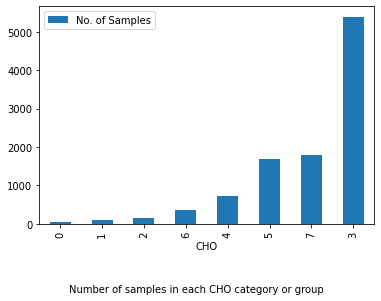

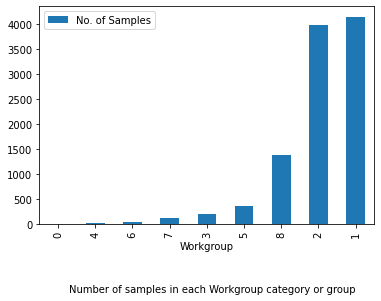

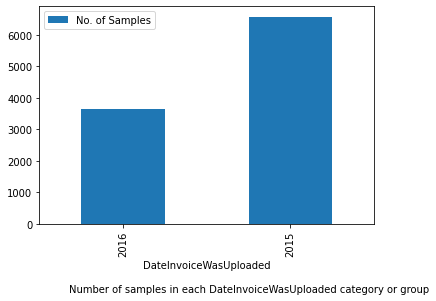

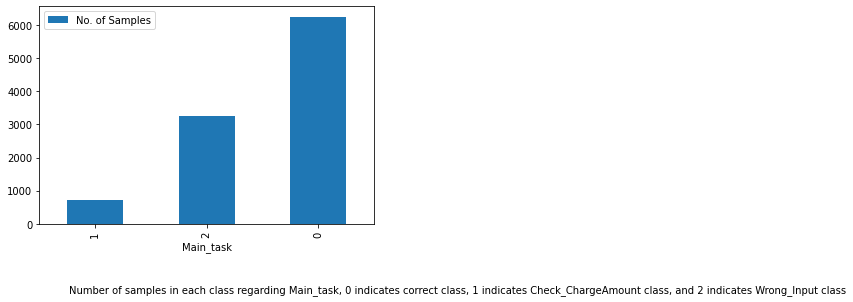

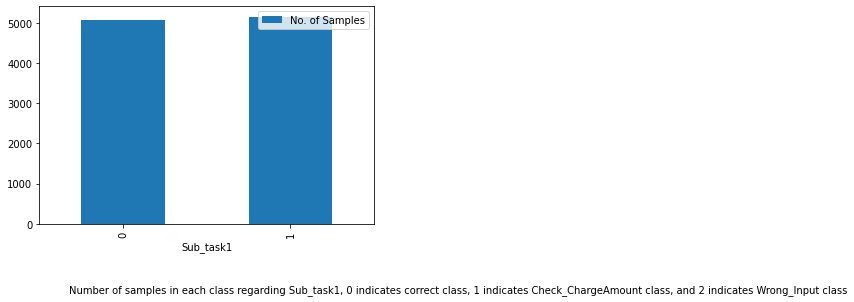

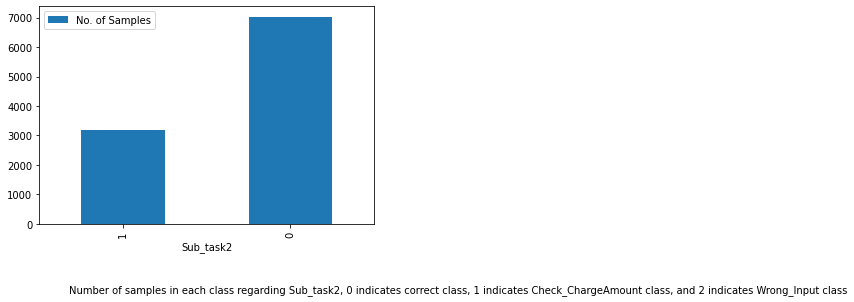

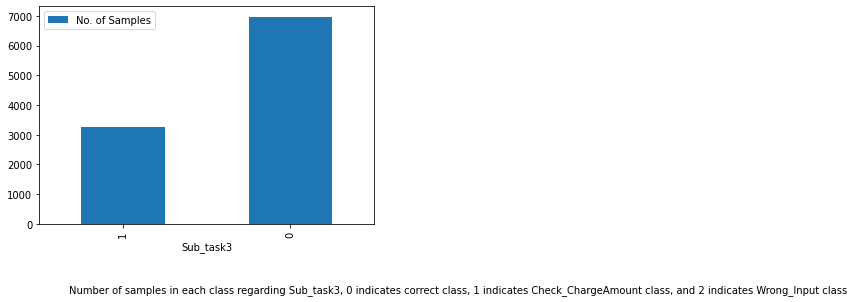

In [2]:
#/------------------------------------------------------------------------------------------------------------------------------------
# Question1:
###Sachcontrol Project
# Step 1. Define Problems.
# This code shows how : 
# a) Loading the dataset.
# b) Simple processing for dataset.
# c) Investigating the different distribution of dataset based on different variables (features) from datasets.
# d) Define multi_classification problem based on the investigation in c, classify when the input invoice correct or need ... 
#    to check the charge amount or wrong input (some important features missing, when TotalPenaltyChargeAmount ...
#    is nan the original and current features should be identical ,wrong computation  for ...
#    OriginalTotalToPayAmount feature or SettledAmount feature or both).
# e) Define the performance problem regarding 4 features. Regarding the problem in d, I present the ...
#    performance of CHO categories, Workgroup categories, the people at the insurance company processing the ...
#    invoice, DateInvoiceWasUploaded, and identify the worst performance.
#/------------------------------------------------------------------------------------------------------------------------------------

# The libraries that I use to define the problem

import csv
import os
import pandas as pd
import numpy as np
#import dataframe_image as dfi
#from dataframe_image._screenshot import Screenshot
from collections import Counter
import matplotlib.pyplot as plt

#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to extract the 26 features and 10225 samples from L1_dataset_Update.csv file into the...
#  Dataset.csv, which will be use in this project to solve the problem

def extract_dataset():
    
    # Read from CSV file 
    filename = 'L1_dataset'
    with open(filename +'.csv' ,'rt')as infile:
         data = csv.reader(infile) 
         columnA = list()
         for row in data:
            columnA.append(row[0])

    if not os.path.exists('Question1'):
           os.makedirs('Question1')    

    # Write into CSV file        
    with open('Question1/'+filename +'_Update.csv', 'w', newline='') as outfile:
         row_data = csv.writer(outfile)
         for row in columnA:
             Temp = row.split("|") 
             row_data.writerow(Temp)
             
    return filename       
#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to process the 26 features within 10225 samples by replacing nan values feature into 0 and ...
# using only the year from  DateInvoiceWasUploaded feature and DateclaimmovedtoInvoicePaymentLogged feature.
    
def preprocess_dataset(df):
    
    df=df.fillna(0)
    df['DateInvoiceWasUploaded'] = pd.DatetimeIndex(df['DateInvoiceWasUploaded']).year
    df['DateclaimmovedtoInvoicePaymentLogged'] = pd.DatetimeIndex(df['DateclaimmovedtoInvoicePaymentLogged']).year
    return df

#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to label the samples based on classes based on multi_classification probem which identified after the ...
# investigation the different distribution of dataset based on different variables (features) from datasets and ...
# figure out the correlation between features. 
# I identify 3 sub-tasks, which I use with Decision Fusion method :
# The Sub-task1 is classify when both OriginalTotalToPayAmount feature and SettledAmount feature are identical and ...
# InvoiceSavingRule is nan. 
# The Sub-task2 is classify when there is InvoiceSavingRule or nan.
# The Sub-task3 is classify when there is problem with invoice input (some important features missing, when ... 
# TotalPenaltyChargeAmount is nan the original and current features should be identical ,wrong claclution for ... 
# OriginalTotalToPayAmount feature or SettledAmount feature or both)
    

def identfy_tasks_from_dataset(filename): 
    
    # Load dataset
    filename_read = 'Question1/'+ filename + '_Update' + '.csv'
    df = pd.read_csv(filename_read)
    
    # Preprocess dataset
    df = preprocess_dataset(df)
    
    # Initialzing the Label in the multi_classification problem (The problem = I call it Main_task)
    df['Label'] = 0
    
    # Initialzing the Label in the 3 sub-tasks problems (The problem = I call them Sub-task1, Sub-task2, and Sub-task3)
    df['Label_task1'], df['Label_task2'], df['Label_task3'] = 0, 0, 0
    
    # labeling each samples based on  multi_task and the 3 tasks 
    for i in range(len(df.index)):
        
        # labeling Main_task 
        if ((df.loc[i,'OriginalTotalToPayAmount'] == df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule'] == 0 and round(df.loc[i,'OriginalHireGross'] + df.loc[i,'OriginalRepairGross'] + df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2) == df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount'] == round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'],2) and df.loc[i,'OriginalHireGross'] != 0 and df.loc[i,'CurrentHireGross']!=0 and df.loc[i,'OriginalHireDays'] == df.loc[i,'CurrentHireDays'])or(df.loc[i,'OriginalTotalToPayAmount'] != df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule']!= 0 and round(df.loc[i,'OriginalHireGross'] + df.loc[i,'OriginalRepairGross'] + df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2) == df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount']== round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'] + df.loc[i,'TotalPenaltyChargeAmount'],2) and df.loc[i,'OriginalHireGross'] != 0 and df.loc[i,'CurrentHireGross'] != 0)):
          
           df.loc['Label'] = 0
           
        elif ((df.loc[i,'OriginalTotalToPayAmount'] == df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule'] !=0 and round(df.loc[i,'OriginalHireGross'] + df.loc[i,'OriginalRepairGross'] + df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2) == df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount'] == round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'],2) and df.loc[i,'TotalPenaltyChargeAmount'] !=0 and df.loc[i,'OriginalHireGross'] !=0 and df.loc[i,'CurrentHireGross'] != 0 ) or (df.loc[i,'OriginalTotalToPayAmount'] !=  df.loc[i,'SettledAmount'] and df.loc[i,'InvoiceSavingRule']==0 and  round(df.loc[i,'OriginalHireGross']+df.loc[i,'OriginalRepairGross']+ df.loc[i,'OriginalEngineerFeeGross'] + df.loc[i,'OriginalTotalLossFeeGross'] + df.loc[i,'OriginalStorageRecoveryGross'],2)== df.loc[i,'OriginalTotalToPayAmount'] and df.loc[i,'SettledAmount'] == round(df.loc[i,'CurrentHireGross'] + df.loc[i,'CurrentRepairGross'] + df.loc[i,'CurrentEngineerFeeGross'] + df.loc[i,'CurrentTotalLossFeeGross'] + df.loc[i,'CurrentStorageRecoveryGross'] + df.loc[i,'TotalPenaltyChargeAmount'],2) and df.loc[i,'TotalPenaltyChargeAmount'] != 0 and df.loc[i,'OriginalHireGross'] !=0 and df.loc[i,'CurrentHireGross'] != 0)):    
           df.loc[i,'Label'] = 1
       
        else : 
              
           df.loc[i,'Label'] = 2
                            
        # labeling Sub_task1
        if(df.loc[i,'InvoiceSavingRule']==0 and df.loc[i,'OriginalTotalToPayAmount']==df.loc[i,'SettledAmount']):
          df.loc[i,'Label_task1'] = 0
        else :
          df.loc[i,'Label_task1'] = 1
          
        # labeling Sub_task2
        if(df.loc[i,'InvoiceSavingRule']==0):
          df.loc[i,'Label_task2'] = 0
        else :
          df.loc[i,'Label_task2'] = 1
          
        # labeling Sub_task3
        if(df.loc[i,'Label']==0 or df.loc[i, "Label"]==1):
          df.loc[i,'Label_task3'] = 0
        else :
          df.loc[i,'Label_task3'] = 1 
     
    df = df[:-1]      
    df.to_csv('Question1/'+ filename + '_Update' + str(1) +'.csv')  
    
    
    return df

#/------------------------------------------------------------------------------------------------------------------------------------
    
# This function is used to show the results of investigating the different distribution of dataset based on different 
# variables (features) from dataset.
# This features are CHO,  Workgroup, InsurerClaimOwner, and DateInvoiceWasUploaded 
    
def dataset_distribution(df):
    
    # Use only 4 features with the label that is identified as multi_classification problem (0 indicates correct invoice, 
    # 1 indicates invoice that needs to check ChargeAmount, and 2 indicates invoice with problems [some important
    # features missing, when TotalPenaltyChargeAmount is nan the original and current features should be identical, wrong computation  
    # for OriginalTotalToPayAmount feature or SettledAmount feature or both])
    
    # Select the 4 features and label from dataset
    sub_df = df[['CHO','Workgroup','InsurerClaimOwner','DateInvoiceWasUploaded']].copy()
    sub_df_class = df[['Label']].copy()
    
    #This list is used to identify each feature values separately to show then its distribution regarding the 3 classes 
    sub_data = list ()
    
   # dislist = list()
    
    # This list is used to identify the 3 classes 
    classes = list(sub_df_class['Label'].unique())
    classes.sort()
       
    # This matrix is used to identify the  worst category performance regading each features (4 features)       
    temp_matrix = np.zeros((sub_df.shape[1], len(classes)))
    str_classes = [str(int) for int in classes]
    
    # This loop to show the distribution regarding the 3 classes for each features (4 features) 
    for i in range(sub_df.shape[1]):
        
        sub_data = sub_df[sub_df.columns[i]].tolist()
        
        # count of samples in each category
        count = list (Counter(sub_data).values())
        # the categories
        key =  list (Counter(sub_data).keys())
        
        # new_df is dataframe to store the categories and the count (number) of samples in each categories and
        # order it based on the number of samples 
        new_df = pd.DataFrame(key, columns=[sub_df.columns[i]])
        new_df.loc[:,'No. of Samples'] = count
        new_df = new_df.sort_values(by=['No. of Samples'])
        
        # Here we save and plot the distribution for each category 
        if sub_df.columns[i]!= 'InsurerClaimOwner' :
          new_df.plot(kind='bar',x=sub_df.columns[i],y=('No. of Samples'))
          plt.annotate(('Number of samples in each '+ sub_df.columns[i] + ' category or group'), (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top')
          plt.savefig('Question1/'+sub_df.columns[i]+' chart.png', dpi=300, bbox_inches='tight')
          new_df.to_csv('Question1/'+ sub_df.columns[i]+' table.csv', index =False) 
         # dfi.export(new_df,'Question1/'+ sub_df.columns[i]+' table.png')
        else :
          new_df.to_csv('Question1/InsurerClaimOwner.csv',index=False)  
        
        # Add the label into the original dataframe to show how each category perform with the multi_classification problem (3 classes) 
        sub_df.loc[:,'Label'] = df[['Label']]
        
        # Here I extract for each class how each category perfom 
        dis = np.zeros((len(key), len(str_classes)))  
        for j in range(len(classes)):
            for k in range (len(key)):
                temp = sub_df[(sub_df['Label']==classes[j]) & (sub_df[sub_df.columns[i]]==key[k])].count()
                dis[k][j]= round(temp[0]/count[k]*100,2)
        
        # This list is used to convert the shape of the obtained 3D matrix (dis) into 3 sperate lists
        concl = list()
        for ii in range (dis.shape[1]):
            concl.append (dis[:,ii])
            
        # Combine the 3 lists (results of all classed) to insert into another dataframe called dis_df to save the results 
        data_tuples = list(zip(key,concl[0],concl[1],concl[2],count))          
        dis_df = pd.DataFrame(data_tuples, columns=['Id', 'correct','Check_ChargeAmount','Wrong_Input','No of samples'])
        dis_df = dis_df.sort_values(by=['No of samples'])
        dis_df.to_csv('Question1/'+ sub_df.columns[i]+' the percentage of class based on the their category or group.csv', index =False) 
       # dfi.export(dis_df,'Question1/'+sub_df.columns[i]+' the percentage of class based on the their category or group.png')

        # return the index of the highst percentage for each feature in each class (3) 
        index = dis_df.idxmax()
        temp = dis_df.loc[index[1:-1],['Id']]
        temp = temp.iloc[:,0].tolist()
        temp = np.asarray(temp)
        temp_matrix [i][:]=  temp

    # This list is used to combine the worse category for the 4 feature in each class (3)  
    conclusion = list()
    for iii in range (temp_matrix.shape[1]):
        conclusion.append ( temp_matrix[:,iii])  
        
    # Combine the 3 lists (results of all classed) to insert into another dataframe called conclusion_df to save the results
    data_tuples = list(zip(list(sub_df.columns.values),conclusion[0],conclusion[1],conclusion[2]) )
    conclusion_df = pd.DataFrame(data_tuples, columns=['Variable','correct','Check_ChargeAmount','Wrong_Input'])   
    conclusion_df['correct'] = conclusion_df['correct'].astype(int)
    conclusion_df['Check_ChargeAmount'] = conclusion_df['Check_ChargeAmount'].astype(int)
    conclusion_df['Wrong_Input'] = conclusion_df['Wrong_Input'].astype(int)
    new_df.to_csv('Question1/First conclusion.csv', index =False) 
    #dfi.export(conclusion_df,'Question1/First conclusion.png')
    
    return

#/------------------------------------------------------------------------------------------------------------------------------------

def dataset_distribution_based_on_tasks(df):  
      
# This function is used to show the results of investigating the different distribution of dataset regarding the main_task and the 3 sub_tasks 
# Also I plt and saved the distribution    
    sub_df = df[['Label','Label_task1','Label_task2','Label_task3']].copy()
    sub_df = sub_df.rename(columns={'Label': 'Main_task', 'Label_task1': 'Sub_task1', 'Label_task2': 'Sub_task2', 'Label_task3': 'Sub_task3'})
    
    for i in range(sub_df.shape[1]):
        
        sub_data = sub_df.loc[:,sub_df.columns[i]].tolist() 
        new_df = pd.DataFrame(Counter(sub_data).keys(), columns=[sub_df.columns[i]])
        new_df.loc[:,'No. of Samples'] = Counter(sub_data).values()
        new_df = new_df.sort_values(by=['No. of Samples'])
        new_df.plot(kind='bar',x=sub_df.columns[i],y=('No. of Samples'))
        plt.annotate(('Number of samples in each class regarding ' + sub_df.columns[i] + ', 0 indicates correct class, 1 indicates Check_ChargeAmount class, and 2 indicates Wrong_Input class'), (0,0), (30, -60), xycoords='axes fraction', textcoords='offset points', va='top')
        plt.savefig('Question1/' + sub_df.columns[i]+'.png', dpi=300, bbox_inches='tight')
 
    return


#/------------------------------------------------------------------------------------------------------------------------------------

# This function is used to extract the 26 features and 10225 samples from L1_dataset_Update.csv
filename = extract_dataset() 

# Investigating the different distribution of dataset based on different variables (features) from datasets and identifying the problems
df = identfy_tasks_from_dataset(filename)

# Present the different distribution of dataset based on different variables (features) from dataset
dataset_distribution(df)

# Present the different distribution of dataset regarding the main_task and the 3 sub_tasks 
dataset_distribution_based_on_tasks(df)